## Make spatial plots showing African Easterly Jets and Tropical Easterly Jets in relation to Rainfall over Ghana on June 18, 2018

In [1]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path
import numpy as np

In [2]:
Data = Path(r"C:/Users/USER/Downloads/Compressed/Tropical Project/Wind uv at 700-200hps/data_stream-oper_stepType-instant.nc")
Prep_Data = Path(r"C:/Users/USER/Downloads/Compressed/Tropical Project/Wind uv at 700-200hps/prep.nc")
shape = Path(r"C:/Users/USER/Downloads/Compressed/Tropical Project/Wind uv at 700-200hps/gadm41_GHA_1.shp")

In [3]:
ds_wind = xr.open_dataset(Data)
ds_wind

<xarray.Dataset> Size: 235kB
Dimensions:         (valid_time: 24, pressure_level: 2, latitude: 29,
                     longitude: 21)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 192B 2018-06-18 ... 2018-06-1...
  * pressure_level  (pressure_level) float64 16B 700.0 200.0
  * latitude        (latitude) float64 232B 11.5 11.25 11.0 ... 5.0 4.75 4.5
  * longitude       (longitude) float64 168B -3.5 -3.25 -3.0 ... 1.0 1.25 1.5
    number          int64 8B ...
    expver          (valid_time) <U4 384B ...
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 117kB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 117kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-26T17:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
ds_prep = xr.open_dataset(Prep_Data)
ds_prep

<xarray.Dataset> Size: 59kB
Dimensions:     (valid_time: 24, latitude: 29, longitude: 21)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 2018-06-18 ... 2018-06-18T23...
  * latitude    (latitude) float64 232B 11.5 11.25 11.0 10.75 ... 5.0 4.75 4.5
  * longitude   (longitude) float64 168B -3.5 -3.25 -3.0 -2.75 ... 1.0 1.25 1.5
    number      int64 8B ...
    expver      (valid_time) <U4 384B ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 58kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-28T17:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
ghana_shp = gpd.read_file(shape)

In [6]:
p = ghana_shp.crs
print(p)

EPSG:4326


In [7]:
date = '2018-06-18'
wind_sel = ds_wind.sel(valid_time=date, method='nearest')
#prep_sel = ds_prep.sel(valid_time=date, method='nearest')
precip = ds_prep['tp'].sel(valid_time=date).sum(dim='valid_time') #summed up the time for the day since plotting precipitation as a 3d variable showed errors
#wind_sel = ds_wind
#prep_sel = ds_prep

In [8]:
#precip = prep_sel['tp']
#precip

In [9]:
lons = wind_sel.longitude
lats = wind_sel.latitude
lon_grid, lat_grid = np.meshgrid(lons, lats)

In [10]:
u_700 = wind_sel['u'].sel(pressure_level=700)
v_700 = wind_sel['v'].sel(pressure_level=700)

In [11]:
jet_strength_700 = -u_700
jet_strength_700

<xarray.DataArray 'u' (latitude: 29, longitude: 21)> Size: 2kB
array([[ 9.411209 ,  9.36824  ,  8.858475 ,  7.5869904,  6.8994904,
         7.032303 ,  6.5615997,  5.692459 ,  5.0615997,  4.754959 ,
         4.5908966,  4.6553497,  4.8252716,  5.143631 ,  6.065506 ,
         6.9658966,  7.600662 ,  8.1514435,  8.43074  ,  8.756912 ,
         9.174881 ],
       [ 7.643631 ,  7.7002716,  7.6983185,  6.9014435,  6.4971466,
         6.9326935,  6.6397247,  5.739334 ,  4.9522247,  4.422928 ,
         4.034256 ,  4.3877716,  5.2959747,  5.739334 ,  6.6026154,
         7.674881 ,  8.106522 ,  8.428787 ,  8.633865 ,  8.954178 ,
         9.372147 ],
       [ 6.333084 ,  6.4170685,  6.8272247,  7.0772247,  7.2744904,
         7.350662 ,  6.6553497,  5.6221466,  4.8233185,  4.647537 ,
         4.6065216,  5.032303 ,  6.3057404,  7.1397247,  8.241287 ,
         9.55574  ,  9.887772 , 10.03035  , 10.204178 , 10.454178 ,
        10.723709 ],
       [ 6.6045685,  6.9951935,  7.6182404,  8.325272 ,  8.631912 ,
         8.1866   ,  7.1651154,  6.1983185,  5.583084 ,  6.038162 ,
         6.9932404,  7.772537 ,  9.022537 , 10.143631 , 11.184647 ,
        12.0264435, 12.022537 , 11.89949  , 11.797928 , 11.78035  ,
        11.784256 ],
...
       [ 5.5283966,  7.049881 ,  7.676834 ,  6.501053 ,  5.678787 ,
         6.254959 ,  6.516678 ,  5.5908966,  4.551834 ,  4.9951935,
         6.6865997,  7.819412 ,  8.5576935,  9.204178 ,  9.251053 ,
         9.059647 ,  8.852615 ,  8.506912 ,  7.768631 ,  7.1514435,
         7.6533966],
       [ 6.208084 ,  7.112381 ,  7.329178 ,  6.190506 ,  5.7764435,
         7.098709 ,  8.378006 ,  8.454178 ,  7.395584 ,  6.5928497,
         6.725662 ,  7.4307404,  8.489334 ,  8.8701935,  8.641678 ,
         8.616287 ,  8.661209 ,  8.460037 ,  7.7920685,  7.1182404,
         7.2451935],
       [ 7.7490997,  7.8389435,  7.768631 ,  7.159256 ,  7.053787 ,
         8.040115 ,  9.333084 , 10.129959 ,  9.512772 ,  8.30574  ,
         7.641678 ,  8.0616   ,  8.997147 ,  9.0576935,  8.803787 ,
         8.856522 ,  9.049881 ,  9.139725 ,  8.770584 ,  8.178787 ,
         7.897537 ],
       [ 8.208084 ,  8.081131 ,  8.116287 ,  8.106522 ,  8.176834 ,
         8.346756 ,  8.702225 ,  9.233475 ,  9.215897 ,  8.950272 ,
         8.856522 ,  9.254959 ,  9.8116   ,  9.8116   ,  9.626053 ,
         9.413162 ,  9.454178 ,  9.6670685,  9.551834 ,  9.200272 ,
         8.909256 ]], dtype=float32)
Coordinates:
  * latitude        (latitude) float64 232B 11.5 11.25 11.0 ... 5.0 4.75 4.5
  * longitude       (longitude) float64 168B -3.5 -3.25 -3.0 ... 1.0 1.25 1.5
    number          int64 8B ...
    valid_time      datetime64[ns] 8B 2018-06-18
    pressure_level  float64 8B 700.0
    expver          <U4 16B ...
Attributes: (12/31)
    GRIB_paramId:                             131
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      609
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           u
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

In [12]:
wind_speed_700 = np.sqrt(u_700**2 + v_700**2)

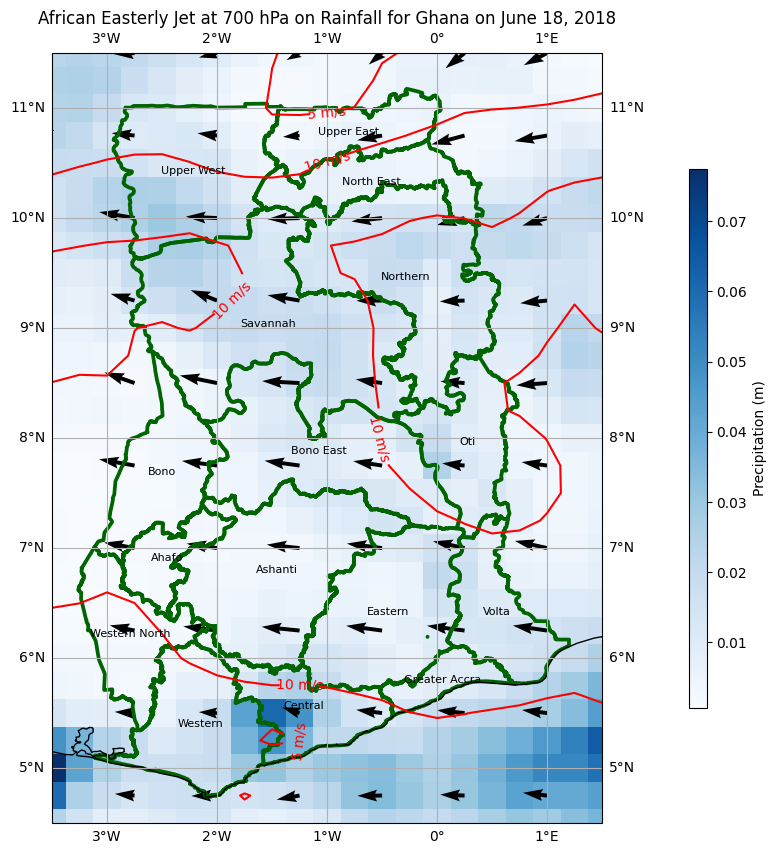

In [16]:
fig1, ax1 = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot precipitation as background.
precip_plot = ax1.pcolormesh(lon_grid, lat_grid, precip, cmap='Blues', transform=ccrs.PlateCarree(), alpha=1)
plt.colorbar(precip_plot, ax=ax1, orientation='vertical', pad=0.08, aspect=30,shrink=0.7, label='Precipitation (m)')
ax1.gridlines(draw_labels=True)

# Overlay wind vectors (quiver). Thin out arrows for clarity (here, it shows at every thrird grid point..i guess).
quiver = ax1.quiver(lon_grid[::3, ::3], lat_grid[::3, ::3], u_700[::3, ::3], v_700[::3, ::3],
                    scale=200, transform=ccrs.PlateCarree(), color='black')

# Overlay contours for jet strength 
contour_levels = np.arange(5,30, 5)  #so it has 5ms intervals
cont = ax1.contour(lon_grid, lat_grid, jet_strength_700, levels=contour_levels, colors='red',
                   linewidths=1.5, transform=ccrs.PlateCarree())
ax1.clabel(cont, inline=True, fontsize=10, fmt='%d m/s')

# We added region boundaries and labels
for idx, (region_name, geometry) in enumerate(zip(ghana_shp['NAME_1'], ghana_shp.geometry)):
    
    # Plotting of region boundaries
    ax1.add_geometries([geometry], ccrs.PlateCarree(), edgecolor='darkgreen', facecolor='none', linewidth=2.7)
    
    # We added region labels at the centroid
    centroid = geometry.centroid
    ax1.text(centroid.x, centroid.y, region_name, fontsize=8, ha='center', va='center', transform=ccrs.PlateCarree())
# Add Ghana boundary.
#ax1.add_geometries(ghana_shp.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=2.7)

# Add map features.
ax1.coastlines()
#ax1.add_feature(cfeature.BORDERS)
#ax1.add_feature(cfeature.STATES)

# Set extent to West Africa/Ghana region.
ax1.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())

# Titles and labels.
ax1.set_title('African Easterly Jet at 700 hPa on Rainfall for Ghana on June 18, 2018')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Save or show the plot.
#plt.savefig('AEJ_on_rainfall.png')
plt.show()

In [17]:
u_200 = wind_sel['u'].sel(pressure_level=200)
v_200 = wind_sel['v'].sel(pressure_level=200)

# making jet strength as -u.
jet_strength_200 = -u_200

# finding thr wind speed.
wind_speed_200 = np.sqrt(u_200**2 + v_200**2)

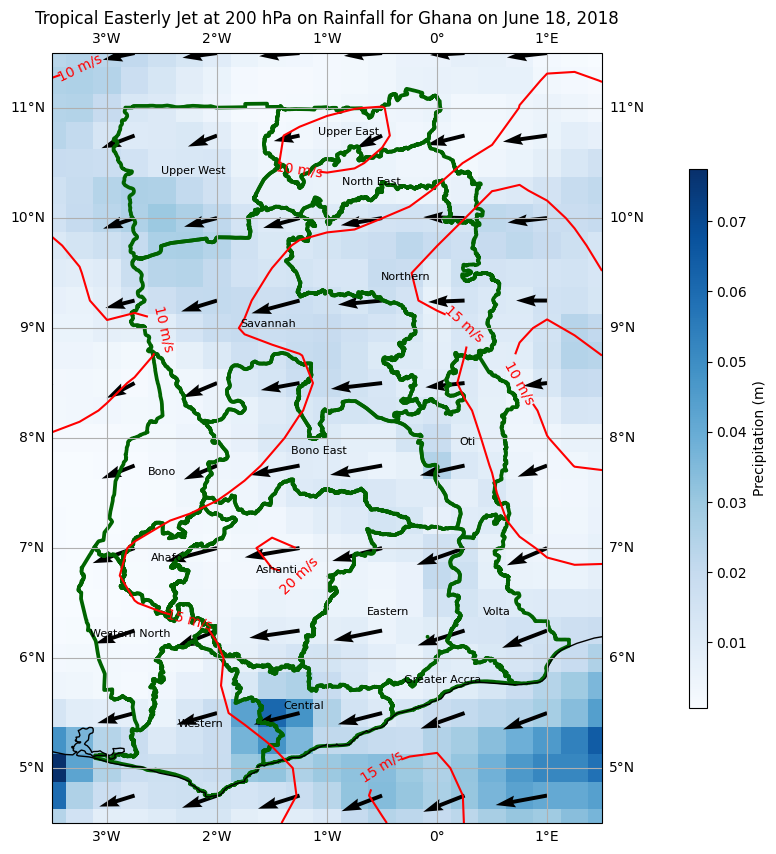

In [18]:
fig2, ax2 = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotting precipitation as background.
precip_plot = ax2.pcolormesh(lon_grid, lat_grid, precip, cmap='Blues', transform=ccrs.PlateCarree(), alpha=1)
plt.colorbar(precip_plot, ax=ax2, orientation='vertical', pad=0.08, aspect=30,shrink=0.7, label='Precipitation (m)')                        # controls how "thin" or "fat" the bar looks
ax2.gridlines(draw_labels=True)

# quiver for wind vectors.
quiver = ax2.quiver(lon_grid[::3, ::3], lat_grid[::3, ::3], u_200[::3, ::3], v_200[::3, ::3],
                    scale=200, transform=ccrs.PlateCarree(), color='black')

# contours for jet strength.
cont = ax2.contour(lon_grid, lat_grid, jet_strength_200, levels=contour_levels, colors='red',
                   linewidths=1.5, transform=ccrs.PlateCarree())
ax2.clabel(cont, inline=True, fontsize=10, fmt='%d m/s')

for idx, (region_name, geometry) in enumerate(zip(ghana_shp['NAME_1'], ghana_shp.geometry)):
    
    # Plotting of region boundaries
    ax2.add_geometries([geometry], ccrs.PlateCarree(), edgecolor='darkgreen', facecolor='none', linewidth=2.7)
    
    # We added region labels at the centroid
    centroid = geometry.centroid
    ax2.text(centroid.x, centroid.y, region_name, fontsize=8, ha='center', va='center', transform=ccrs.PlateCarree())
# Ghana boundary.
#ax2.add_geometries(ghana_shp.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='green', linewidth=2.7)

#  map features.
ax2.coastlines()
#ax2.add_feature(cfeature.BORDERS) caused error with the true shapefile
#ax2.add_feature(cfeature.STATES)

# Set extent.
ax2.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())

# Titles and labels.
ax2.set_title('Tropical Easterly Jet at 200 hPa on Rainfall for Ghana on June 18, 2018')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Save or show plot.
#plt.savefig('TEJ_on_rainfall.png')
plt.show()

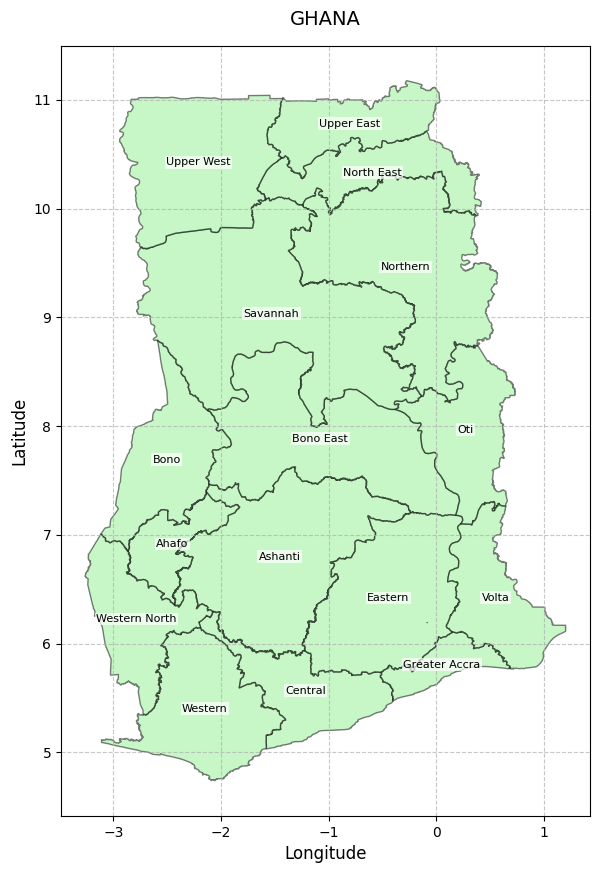

In [36]:
fig, ax = plt.subplots(figsize=(10, 10)) # We create a new figure and axis for our map with a size of 10x10 inches to make it clear and readable.

ghana_shp.plot(ax=ax, edgecolor='black', facecolor='lightgreen', alpha=0.5)   # We plot the shapefile on our axis, with black outlines, light green fill
                                                                              # color, and 50% transparency to make the map visually appealing.

for idx, row in ghana_shp.iterrows():                                         # We loop through each row in our Ghana shapefile to process every region 
                                                                              # one by one.
    
    centroid = row.geometry.centroid                                          # We calculate the center point of every region to place the label there.
    
    region_name = row['NAME_1']                                               # We get the name of the region in our shapefile data.
    
    ax.annotate(                                                              # We add a label with the region name at the centroid position on the map.
        text=region_name,                                                     # We set the label text to the region's name.
        xy=(centroid.x, centroid.y),                                          # We place the label at the centroid's x and y coordinates.
        xytext=(0, 0),                                                        # We set no offset for the label, so it sits right at the centroid.
        textcoords="offset points",                                           # We use offset points for positioning the label relative to the centroid.
        ha='center',                                                          # We center the label horizontally so it looks neat.
        va='center',                                                          # We center the label vertically for proper alignment.
        fontsize=8,                                                           # We set the font size to 8 so the labels are readable but not too large.
        color='black',                                                        # We use black text for the labels to ensure they stand out.
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)      # We add a white background box with 70% transparency behind each label.. 
                                                                              # with no border and a small padding, to make the text easier to read.
    )


plt.title("GHANA", fontsize=14, pad=15)                                       # We add a title "GHANA" at the top of the map with a font size of 14 and 
                                                                              # some padding to space it nicely.

ax.set_xlabel("Longitude", fontsize=12)                                       # We label the x-axis with a font size of 12 for clarity.
ax.set_ylabel("Latitude", fontsize=12)                                        # We label the y-axis with a font size of 12 to match the x-axis.

ax.grid(True, linestyle='--', alpha=0.7)                                      # We add a grid to the map with dashed lines and 70% transparency to help.. 
                                                                              # with reading coordinates without cluttering the map.'''


#plt.savefig('GHANA.png', dpi=600, bbox_inches='tight')                        # We save the map as a PNG file named 'GHANA.png' with a high resolution 
                                                                              # (600 dpi) for our report, and use 'tight' to ensure no parts are cut off.

plt.show()                                                                    # We display the map so we can review it.